## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv(r"C:\Users\2kjph5\OneDrive - Merit Automotive Electronics Systems, S.L\03-Miscellaneous\Studies\Learning\python\100_days_of_code_python_new\day_72\QueryResults_new.csv", names=['DATE', 'TAG', 'POSTS'], header = 0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,163
3,2008-08-01 00:00:00,c,84
4,2008-08-01 00:00:00,python,124


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.shape

(2174, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.count()

DATE     2174
TAG      2174
POSTS    2174
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,38400
c,363490
c#,1493711
c++,734808
delphi,48448
go,55678
java,1793412
javascript,2260018
perl,65836


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [7]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,157,157
c,157,157
c#,158,158
c++,157,157
delphi,157,157
go,142,142
java,157,157
javascript,157,157
perl,157,157


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [9]:
df.DATE = pd.to_datetime(df.DATE)

In [10]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,84
4,2008-08-01,python,124


## Data Manipulation



In [11]:
reshaped_df = df.pivot(index = 'DATE', columns= 'TAG', values = 'POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,84.0,507.0,164.0,14.0,NaN,222.0,163.0,28.0,160.0,124.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,540.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,344.0,2453.0,6770.0,4346.0,186.0,683.0,9526.0,18684.0,143.0,5120.0,26554.0,5615.0,605.0,2532.0
2021-05-01,326.0,2260.0,6573.0,4601.0,179.0,701.0,9717.0,18482.0,122.0,5096.0,26125.0,5403.0,446.0,2213.0
2021-06-01,281.0,2011.0,6451.0,4192.0,133.0,649.0,9259.0,17730.0,157.0,4900.0,24628.0,4956.0,470.0,2128.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [12]:
reshaped_df = reshaped_df.fillna(0)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,84.0,507.0,164.0,14.0,0.0,222.0,163.0,28.0,160.0,124.0,0.0,71.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,540.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1989.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,503.0,452.0,1.0,159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,344.0,2453.0,6770.0,4346.0,186.0,683.0,9526.0,18684.0,143.0,5120.0,26554.0,5615.0,605.0,2532.0
2021-05-01,326.0,2260.0,6573.0,4601.0,179.0,701.0,9717.0,18482.0,122.0,5096.0,26125.0,5403.0,446.0,2213.0
2021-06-01,281.0,2011.0,6451.0,4192.0,133.0,649.0,9259.0,17730.0,157.0,4900.0,24628.0,4956.0,470.0,2128.0


In [13]:
reshaped_df.isna().values.any()

False

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

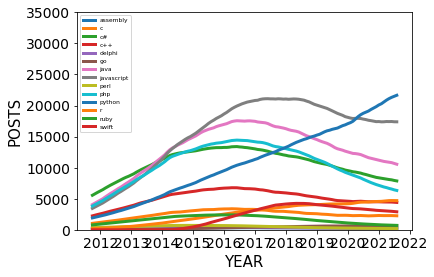

<Figure size 1152x720 with 0 Axes>

In [33]:
roll_df = reshaped_df.rolling(window=40).mean()

for col in roll_df.columns:
    plt.plot(roll_df.index, roll_df[col], linewidth=3, label=roll_df[col].name)
# plt.plot(roll_df.index, roll_df['c'])
# plt.plot(roll_df.index, roll_df['java'])
# plt.plot(roll_df.index, roll_df['c++'])
plt.legend(fontsize = 6)
plt.xlabel('YEAR', fontsize = 15)
plt.ylabel('POSTS', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(0,35000)
plt.figure(figsize = (16,10))
plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 